# Multithreading & Multiprocessing
#### **Author: Eric Tsai**
---
[Notebook Reference](https://github.com/bfortuner/ml-study/blob/master/multitasking_python.ipynb)
>**Introduction:** <br> 
**Both Multiprocessing and Multithreading are used to increase the computing power of a system.**<p>
**Object:** <br>
**In this nootbook, testing the several tasks to find out multithreading and multiprocessing insight.**

### Compare both Multithreading & Multiprocessing
---
|S.NO   |MULTIPROCESSING|MULTITHREADING|
|:----------:|:-------------|:------|
| 1. |In Multiprocessing, CPUs are added for increasing computing power.|While In Multithreading, many threads are created of a single process for increasing computing power.|
| 2. |In Multiprocessing, Many processes are executed simultaneously.|While in multithreading, many threads of a process are executed simultaneously.|
| 3. |Multiprocessing are classified into Symmetric and Asymmetric.|While Multithreading is not classified in any categories.|
| 4. |In Multiprocessing, Process creation is a time-consuming process.|While in Multithreading, process creation is according to economical.|
| 5. |In Multiprocessing, every process owned a separate address space.|While in Multithreading, a common address space is shared by all the threads.|

[Diagram Reference](https://docs.openquake.org/oq-engine/2.0/_modules/concurrent/futures/process.html)
```python
'''Implements ProcessPoolExecutor.

The following diagram and text describe the data-flow through the system:

|======================= In-process =====================|== Out-of-process ==|

+----------+     +----------+       +--------+     +-----------+    +---------+
|          |  => | Work Ids |       |        |     | Call Q    |    | Process |
|          |     +----------+       |        |     +-----------+    |  Pool   |
|          |     | ...      |       |        |     | ...       |    +---------+
|          |     | 6        |    => |        |  => | 5, call() | => |         |
|          |     | 7        |       |        |     | ...       |    |         |
| Process  |     | ...      |       | Local  |     +-----------+    | Process |
|  Pool    |     +----------+       | Worker |                      |  #1..n  |
| Executor |                        | Thread |                      |         |
|          |     +----------- +     |        |     +-----------+    |         |
|          | <=> | Work Items | <=> |        | <=  | Result Q  | <= |         |
|          |     +------------+     |        |     +-----------+    |         |
|          |     | 6: call()  |     |        |     | ...       |    |         |
|          |     |    future  |     |        |     | 4, result |    |         |
|          |     | ...        |     |        |     | 3, except |    |         |
+----------+     +------------+     +--------+     +-----------+    +---------+
'''
```

```python
'''Implements ThreadPoolExecutor.

Main Thread|O-----------0. . . . . . . . . . . . O-----------0|
           |                                                  |
    Thread2|. . . . . . O------------0                        |
           |                                                  |
    Thread3|. . . . . . . . . . . . .O-----------0            |

    O:begain     0: End     -----: running     . . .: suspended
    
''' 
```

## Check cpu number

In [1]:
import multiprocessing

In [2]:
print(f'cpu count: {multiprocessing.cpu_count()}')

cpu count: 4


***Imply we can use 4 workers in multiprocessing***

### Function
---
* **Draw the bar chart**<br>
```python
def visualize_runtimes(results, title):
    start,stop = np.array(results).T
    plt.barh(range(len(start)),stop-start,left=start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    return stop[-1]-start[0]
```
<br>
* **multithreading:**<br>
Multiple threads within a process share the same data space with the main thread and can therefore share information or communicate with each other more easily than if they were separate processes.<br>
```python
def multithreading(func, args, workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)
```
<br>
* **multiprocessing:**<br>
In Multiprocessing, CPUs are added for increasing computing speed of the system.
```python
def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)
```
---

## API Calls (download task)

In [3]:
import API_calls_task as act

#### Function which inside the ```API_calls_task.py```
---
```python
# download file by url
def download(url, base):
    start = time.time()-base # base parameter will be the begin time
    try:
        resp = urlopen(url)
    except Exception as e:
        print ('ERROR: %s' % e)
    stop = time.time()-base
    return start,stop
```
---

#### Set the config

In [4]:
url_N = 10
URL = 'http://scholar.princeton.edu/sites/default/files/oversize_pdf_test_0.pdf'
urls = [URL for i in range(url_N)]

#### Serial

`%timeit` 多次運行給定代碼，然後返回最快結果的速度。

Options:<br>
-n\<N>: execute the given statement <N> times in a loop. If this value is not given, a fitting value is chosen.<br>
-r\<R>: repeat the loop iteration <R> times and take the best result. Default: 3<br>
-t: use time.time to measure the time, which is the default on Unix. This function measures wall time.<br>
-c: use time.clock to measure the time, which is the default on Windows and measures wall time. On Unix, resource.getrusage is used instead and returns the CPU user time.<br>
-p\<P>: use a precision of <P> digits to display the timing result. Default: 3<br>
-q: Quiet, do not print result.<br>
-o: return a TimeitResult that can be stored in a variable to inspect<br>
the result in more details.

In [5]:
%timeit -n 1 [act.download(url, 1) for url in urls]

15 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading
***Get benefit from this.***

14.68182110786438

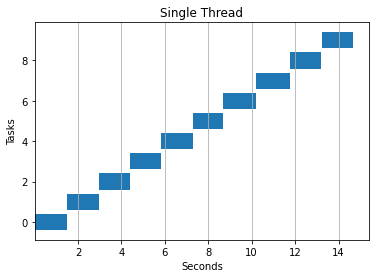

In [6]:
act.visualize_runtimes(act.multithreading(act.download, urls, 1), "Single Thread")

7.629951477050781

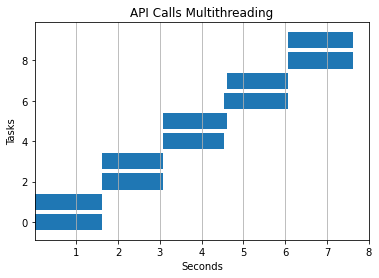

In [7]:
act.visualize_runtimes(act.multithreading(act.download, urls, 2),act.MULTITHREADING_TITLE)

5.79875636100769

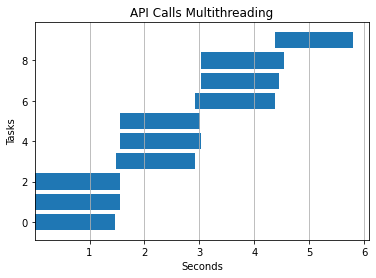

In [8]:
act.visualize_runtimes(act.multithreading(act.download, urls, 3),act.MULTITHREADING_TITLE)

#### Multiprocessing
***Get benefit from this.***

14.900217294692993

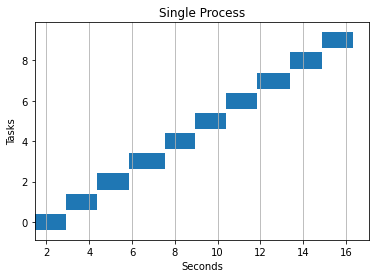

In [9]:
act.visualize_runtimes(act.multiprocessing(act.download, urls, 1), "Single Process")

7.442322015762329

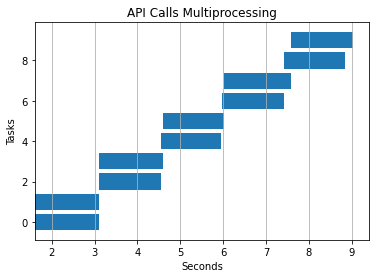

In [10]:
act.visualize_runtimes(act.multiprocessing(act.download, urls, 2), act.MULTIPROCESSING_TITLE)

5.987656116485596

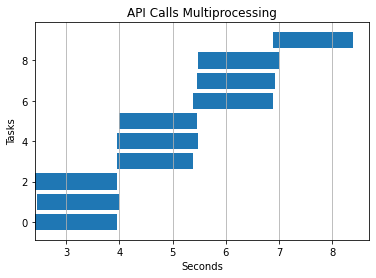

In [11]:
act.visualize_runtimes(act.multiprocessing(act.download, urls, 3), act.MULTIPROCESSING_TITLE)

<code style="background:yellow;color:black">***The performances seem equal but multithreading doesn't need to create more Process. So multithreading is better.***</code>

<div class="alert alert-warning" role="alert">
  <strong>Note!</strong> Clear urls variables 
</div>

In [12]:
del urls
del URL
del url_N
del act

## IO Heavy

In [13]:
import IO_heavy as ioh
import random
import string

#### Function which inside the ```IO_heavy.py```
---
```python
def io_heavy(text,base):
    start = time.time() - base
    f = open('output.txt', 'wt', encoding='utf-8')
    f.write(text)
    f.close()
    stop = time.time() - base
    return start,stop
```
---

#### Set the config

In [14]:
TEXT = ''.join(random.choice(string.ascii_lowercase) for i in range(10**7*5))
text_N = 12

#### Serial

In [15]:
%timeit -n 1 [ioh.io_heavy(TEXT,1) for i in range(text_N)]

4.16 s ± 317 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading

***Get benefit from this.***

3.973771810531616

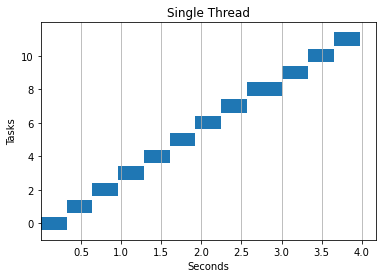

In [16]:
ioh.visualize_runtimes(ioh.multithreading(ioh.io_heavy, [TEXT for i in range(text_N)], 1),"Single Thread")

4.053022861480713

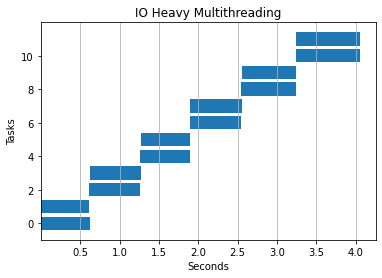

In [17]:
ioh.visualize_runtimes(ioh.multithreading(ioh.io_heavy, [TEXT for i in range(text_N)], 2),ioh.MULTITHREADING_TITLE)

3.5236735343933105

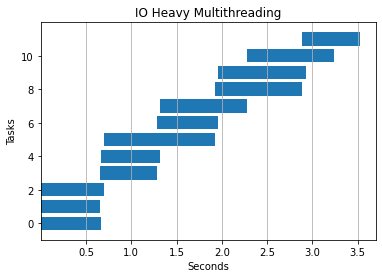

In [18]:
ioh.visualize_runtimes(ioh.multithreading(ioh.io_heavy, [TEXT for i in range(text_N)], 3),ioh.MULTITHREADING_TITLE)

#### Multiprocessing

***Get benefit from this.***

5.377300262451172

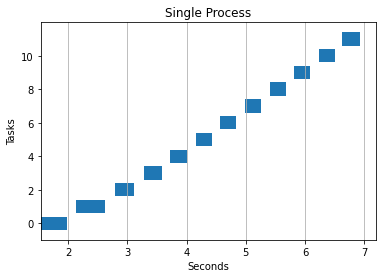

In [19]:
ioh.visualize_runtimes(ioh.multiprocessing(ioh.io_heavy, [TEXT for i in range(text_N)], 1)
                       ,"Single Process")

3.894394874572754

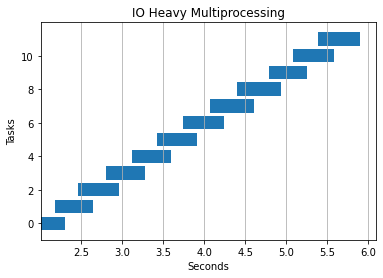

In [20]:
ioh.visualize_runtimes(ioh.multiprocessing(ioh.io_heavy, [TEXT for i in range(text_N)], 2)
                       ,ioh.MULTIPROCESSING_TITLE)

4.031374216079712

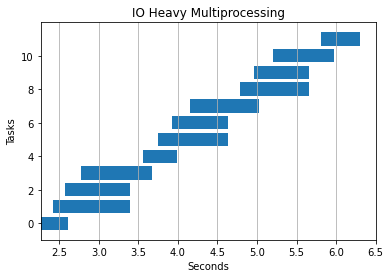

In [21]:
ioh.visualize_runtimes(ioh.multiprocessing(ioh.io_heavy, [TEXT for i in range(text_N)], 3)
                       ,ioh.MULTIPROCESSING_TITLE)

<code style="background:yellow;color:black">***Multithreading is better than multiprocessing. It seems like multithreading can parallel processing without waiting for other tasks.***</code>

<div class="alert alert-warning" role="alert">
  <strong>Note!</strong> Clear urls variables 
</div>

In [22]:
del ioh
del random
del string
del TEXT
del text_N

## Numpy Functions

* ## Numpy Addition

In [23]:
import numpy_addition as na
import numpy as np
import time

#### Function which inside the ```numpy_addition.py```
---
```python
#Does not use parallel processing by default
#But will see speedups if multiprocessing used
#Because numpy sidesteps python's GIL
def addition(i, base):
    start = time.time() - base
    res = a + b
    stop = time.time() - base
    return start,stop
```
---

#### Set the config
---
```python
DIMS = 8000
numpy_add_N = 20
DIMS_ARR = [DIMS for i in range(numpy_add_N)]
a = np.random.rand(DIMS,DIMS)
b = np.random.rand(DIMS,DIMS)
```


---

In [24]:
numpy_add_N = 16

#### Serial

In [25]:
%timeit -n 1 [na.addition(i, time.time()) for i in range(numpy_add_N)]

6.33 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading

***Get benefit from this.***

6.675249099731445

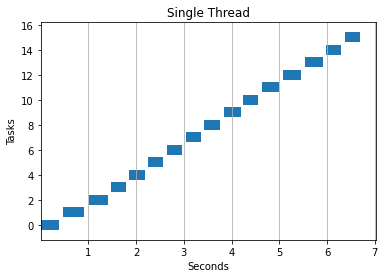

In [26]:
na.visualize_runtimes(na.multithreading(na.addition, [i for i in range(numpy_add_N)], 1),"Single Thread")

4.528297185897827

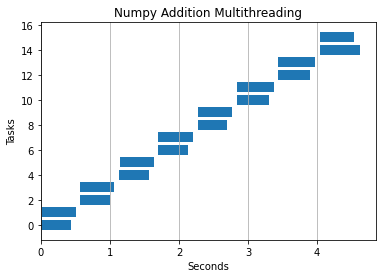

In [27]:
na.visualize_runtimes(na.multithreading(na.addition, [i for i in range(numpy_add_N)], 2),na.MULTITHREADING_TITLE)

4.388317584991455

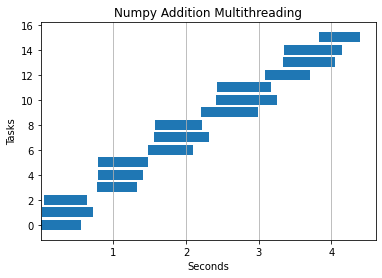

In [28]:
na.visualize_runtimes(na.multithreading(na.addition, [i for i in range(numpy_add_N)], 3),na.MULTITHREADING_TITLE)

#### Multiprocessing

***Get benefit from this.***

6.278285264968872

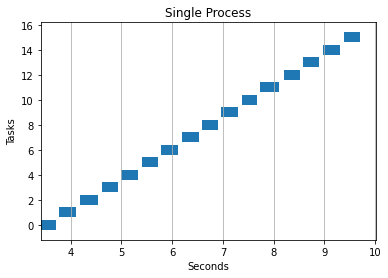

In [29]:
na.visualize_runtimes(na.multiprocessing(na.addition, [i for i in range(numpy_add_N)], 1),"Single Process")

5.002263307571411

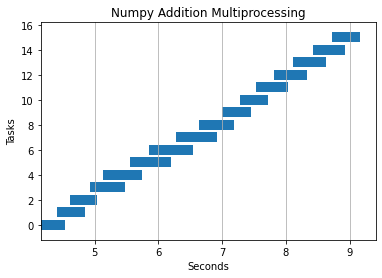

In [30]:
na.visualize_runtimes(na.multiprocessing(na.addition, [i for i in range(numpy_add_N)], 2),na.MULTIPROCESSING_TITLE)

7.353858947753906

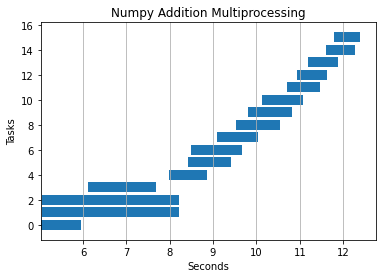

In [31]:
na.visualize_runtimes(na.multiprocessing(na.addition, [i for i in range(numpy_add_N)], 3),na.MULTIPROCESSING_TITLE)

<code style="background:yellow;color:black">***Multithreading is better than multiprocessing. It seems like can parallel processing without waiting for other tasks. But when tasks are many, I think multiprocessing will be better.***</code>

<div class="alert alert-warning" role="alert">
  <strong>Note!</strong> Clear urls variables 
</div>

In [32]:
del numpy_add_N
del na
del np

* ## Dot Product

In [1]:
import dot_product as dp

#### Function which inside the ```dot_product.py```
---
```python
#Automatic parallel processing built works out of the box
#Depending on BLAS impl, MKL (default with anaconda3) does
#Should NOT see speedups with multithreading/processing
def dot_product(i, base):
    start = time.time() - base
    res = np.dot(a,b)
    stop = time.time() - base
    return start,stop
```
---

#### Set the config
---
```python
DIMS = 1500
dot_N = 10
DIMS_ARR = [DIMS for i in range(dot_N)]
a = np.random.rand(DIMS,DIMS)
b = np.random.rand(DIMS,DIMS)
```


---

In [2]:
numpy_dot_N = 10

In [3]:
# meaningless list, only for iteration's need
args = [i for i in range(numpy_dot_N)]

#### Serial

In [6]:
%timeit -n 1 [dp.dot_product(i, time.time()) for i in args]

1.67 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading

***Get benefit from this.***

1.4957659244537354

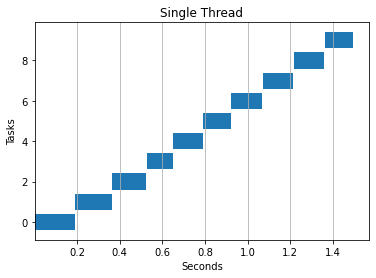

In [7]:
dp.visualize_runtimes(dp.multithreading(dp.dot_product, args, 1),"Single Thread")

1.3107726573944092

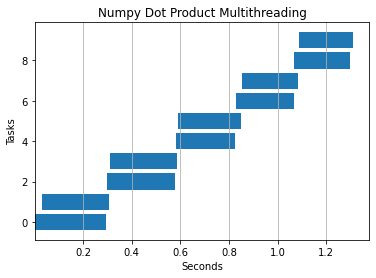

In [8]:
dp.visualize_runtimes(dp.multithreading(dp.dot_product, args, 2),dp.MULTITHREADING_TITLE)

1.57875394821167

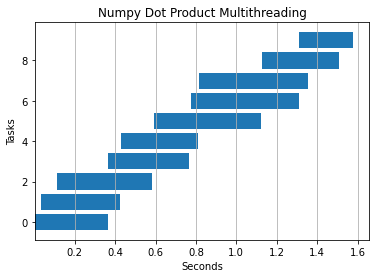

In [9]:
dp.visualize_runtimes(dp.multithreading(dp.dot_product, args, 3),dp.MULTITHREADING_TITLE)

#### Multiprocessing

***Get benefit from this.***

1.7487266063690186

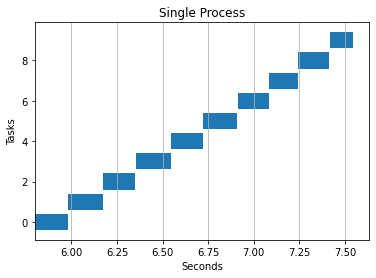

In [10]:
dp.visualize_runtimes(dp.multiprocessing(dp.dot_product, args, 1),"Single Process")

1.1758179664611816

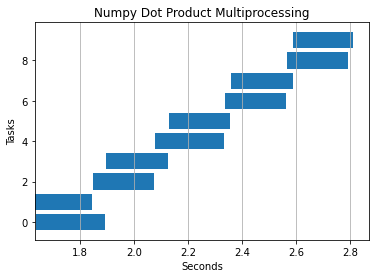

In [11]:
dp.visualize_runtimes(dp.multiprocessing(dp.dot_product, args, 2),dp.MULTIPROCESSING_TITLE)

1.4417753219604492

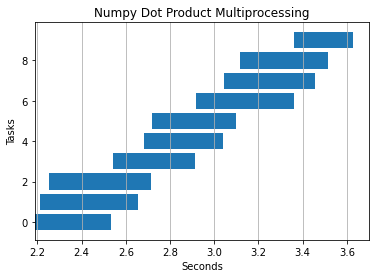

In [12]:
dp.visualize_runtimes(dp.multiprocessing(dp.dot_product, args, 3),dp.MULTIPROCESSING_TITLE)

<code style="background:yellow;color:black">***Multithreading and multiprocessing seem the same. But when tasks are many, I think multiprocessing will be better.***</code>

<div class="alert alert-warning" role="alert">
  <strong>Note!</strong> Clear urls variables 
</div>

In [43]:
del numpy_dot_N
del dp
del args

## CPU Intensive

In [44]:
import CPU_Intensive as ci

#### Function which inside the ```CPU_Intensive.py```
---
```python
def cpu_heavy(n,base):
    start = time.time() - base
    count = 0
    for i in range(n):
        count += i
    stop = time.time() - base
    return start,stop
```
---

In [45]:
cpu_N = 10**7
ITERS = 10
args = [cpu_N for i in range(ITERS)]

#### Serial

In [46]:
%timeit -n 1 [ci.cpu_heavy(cpu_N, time.time()) for i in args]

12.4 s ± 1.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading

No benefit on CPU-intensive tasks

9.344171524047852

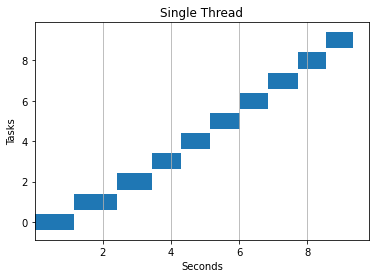

In [47]:
ci.visualize_runtimes(ci.multithreading(ci.cpu_heavy, args, 1),"Single Thread")

9.572448253631592

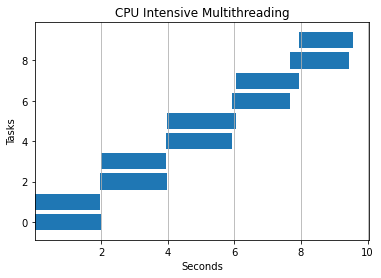

In [48]:
ci.visualize_runtimes(ci.multithreading(ci.cpu_heavy, args, 2),ci.MULTITHREADING_TITLE)

9.020697355270386

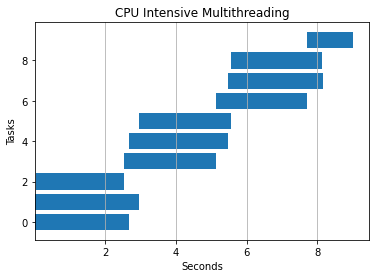

In [49]:
ci.visualize_runtimes(ci.multithreading(ci.cpu_heavy, args, 3),ci.MULTITHREADING_TITLE)

#### Multiprocessing

***Get benefit from this.***

9.173020839691162

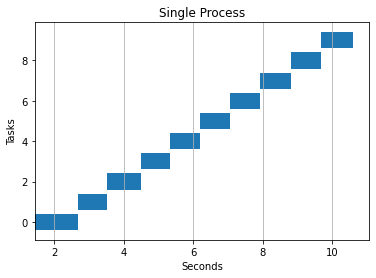

In [50]:
ci.visualize_runtimes(ci.multiprocessing(ci.cpu_heavy, args, 1),"Single Process")

6.276853322982788

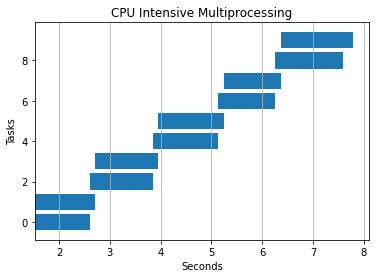

In [51]:
ci.visualize_runtimes(ci.multiprocessing(ci.cpu_heavy, args, 2),ci.MULTIPROCESSING_TITLE)

5.135741710662842

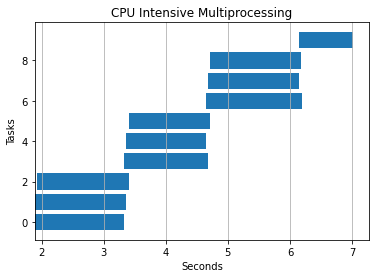

In [52]:
ci.visualize_runtimes(ci.multiprocessing(ci.cpu_heavy, args, 3),ci.MULTIPROCESSING_TITLE)

<code style="background:yellow;color:black">***Multiprocessing is better than multithreading***</code>

<div class="alert alert-warning" role="alert">
  <strong>Note!</strong> Clear urls variables 
</div>

In [53]:
del cpu_N
del ITERS
del args

## Resize Images

[pillow](https://github.com/python-pillow/Pillow/blob/c9f54c98a5dc18685a9bf8c8822f770492a796d6/_imagingtk.c)

In [54]:
import resize_images as ri
import glob

#### Function which inside the ```resize_images.py```
---
```python
#This one takes IO so multithreading might be better?
def resize_img(fpath, base):
    img = Image.open(fpath)
    rimg = img.resize((224,224))
    img.close()
    return rimg
```
---

In [55]:
DATA_PATH='./img/'
fnames = list(glob.iglob(DATA_PATH+'*/*.JPEG'))
img_max_N = 1000

#### Serial

In [56]:
%timeit -n 1 [ri.resize_img(f,1) for f in fnames[:img_max_N]]

1.73 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multithreading

In [57]:
%timeit -n 1 ri.multithreading(ri.resize_img, fnames[:img_max_N], 1)

The slowest run took 4.64 times longer than the fastest. This could mean that an intermediate result is being cached.
20 µs ± 15 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
%timeit -n 1 ri.multithreading(ri.resize_img, fnames[:img_max_N], 2)

33.5 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%timeit -n 1 ri.multithreading(ri.resize_img, fnames[:img_max_N], 3)

31.6 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Multiprocessing
***Get benefit from this.***

In [60]:
%timeit -n 1 ri.multiprocessing(ri.resize_img, fnames[:img_max_N], 1)

1.87 ms ± 903 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%timeit -n 1 ri.multiprocessing(ri.resize_img, fnames[:img_max_N], 2)

1.32 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%timeit -n 1 ri.multiprocessing(ri.resize_img, fnames[:img_max_N], 3)

1.4 ms ± 715 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<code style="background:yellow;color:black">***Multithreading looks faster than multiprocessing, but I think this condition is caused by creating process.(in this case, my number of the image is too small) It dominate the time.***</code>

In [63]:
del DATA_PATH
del fnames
del img_max_N

# Conclusions
---
|TASK   |MULTIPROCESSING|MULTITHREADING|
|:----------|:-------------:|:------:|
| API Calls (download task) |👊|👊|
| IO Heavy                  |👎|👍|
| Numpy Addition            |👊|👊|
| Dot Product               |👊|👊|
| CPU Intensive             |👍|👎|
| Resize Images             |👊|👊|